In [1]:
import json
import os
import numpy as np
import matplotlib.pyplot as plt

Error loading ../src/metrics_weight_robustness_gaussianN_final_encoder.json: [Errno 2] No such file or directory: '../src/metrics_weight_robustness_gaussianN_final_encoder.json'


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


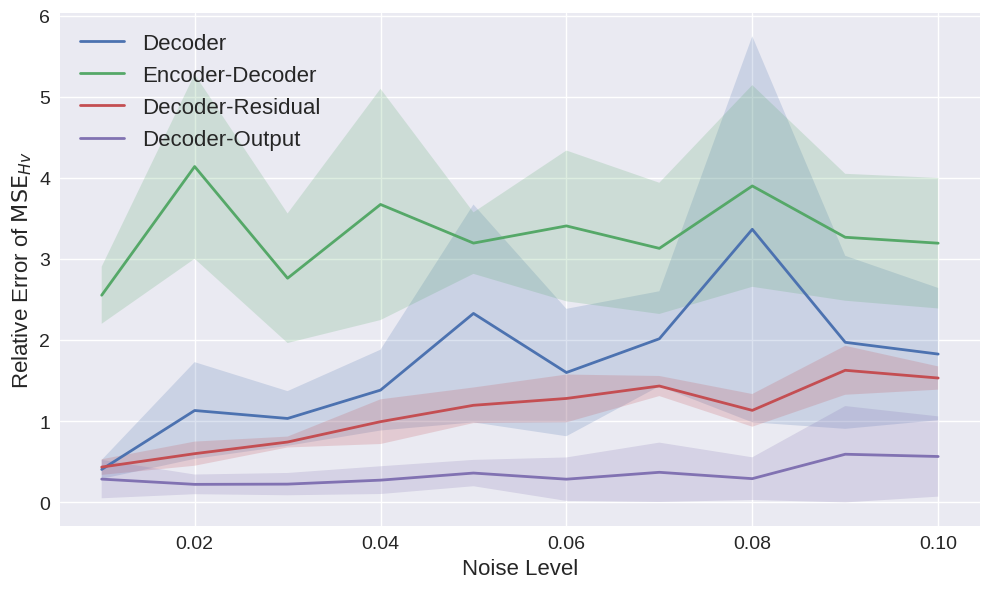

In [3]:
result_dir = '../src'
run_name = "frst_VAE_DeepSDF_20smf"
metric_name = "val_sdf_loss/dataloader_idx_0"

experiments = {
    'Encoder': "encoder",
    'Decoder': "decoder",
    'Encoder-Decoder': "global",
    'Decoder-Residual': "decoder_residual",
    'Decoder-Output': "decoder_output"
}

# noise_levels = [0.0, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009, 0.01]
noise_levels = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
# noise_levels = [0.0, 0.004, 0.008, 0.01, 0.012, 0.016, 0.02] #, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
metric_init_value = 0.00026588255423121154

# plt.style.use('seaborn-whitegrid')  # Use a publication-ready style
plt.style.use("seaborn-v0_8")
plt.figure(figsize=(10, 6))

for exp_name, file_tag in experiments.items():
    # Construct the filepath for the current experiment's results JSON file
    file_path = os.path.join(result_dir, f"metrics_weight_robustness_gaussianN_final_{file_tag}.json")
    try:
        with open(file_path, 'r') as f:
            results = json.load(f)
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        continue

    # Initialize lists for noise levels, mean relative errors, and standard deviations
    x_vals = []
    means = []
    std_devs = []

    # For each noise level (as a string key in the JSON)
    for noise in noise_levels:
        if noise == 0.0:
            continue
        key = str(noise)
        if key in results[run_name]:
            run_vals = np.array(results[run_name][key][metric_name], dtype=float)
            # Compute relative error based on the initial metric value
            # rel_err = (run_vals - metric_init_value) / metric_init_value
            norm_err = np.abs(run_vals - metric_init_value) / (noise**2)
            x_vals.append(noise)
            means.append(np.mean(norm_err))
            std_devs.append(np.std(norm_err))
        else:
            print(f"Warning: Noise level {key} not found in {file_path}")

    # Convert noise level from fraction to percentage
    x_vals = np.array(x_vals)
    means = np.array(means)
    std_devs = np.array(std_devs)
    
    # Plot the mean relative error with its variability
    plt.plot(x_vals, means, label=exp_name, linewidth=2)
    plt.fill_between(x_vals, means - std_devs, means + std_devs, alpha=0.2)

plt.xlabel("Noise Level", fontsize=16)
plt.ylabel("Relative Error of $\\text{MSE}_{Hv}$", fontsize=16)
# plt.title("Robustness Analysis", fontsize=16)
plt.legend(fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.tight_layout()

# Save the figure in publication-ready formats (PDF and EPS)
plt.savefig("../src/robustness/robustness_analysis.pdf", format="pdf", dpi=300, bbox_inches="tight")
plt.savefig("../src/robustness/robustness_analysis.eps", format="eps", dpi=300, bbox_inches="tight")
plt.show()
